<a href="https://colab.research.google.com/github/aasyngier/machine-learning/blob/main/ml_homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: EM Clustering in 2D**
-------------------------------

You have seen how the **Expectation-Maximization (EM)** algorithm can fit a Gaussian Mixture Model (GMM) to a 2D dataset. You should now explore:

## **Primary Question**

**How can we visualize the *decision boundary* for attributing a *new* (unlabeled) point to one of the GMM clusters?**  

In other words, given a 2D data distribution modeled by EM, think of a way to clearly show (on a plot) *which* cluster a point would be assigned to (or which cluster has the highest responsibility (posterior probability) for that point)?  

The plot should comprehensively cover the entire visible region, ensuring that for any point on the plot, it is immediately evident which cluster it would belong to. You can plot **lines** separating clusters or use a **color map** showing each point's "most likely cluster".

You can illustrate your approach with **the same** 2D dataset that we used in class, or you can find another suitable 2D dataset, it's up to you. Note however, that having 3 clusters enhances the clarity of the visualization—while 2 clusters result in overly simple boundaries, using 4 or more clusters can make the entire plot difficult to interpret. Try to choose a dataset with 3 clusters.

Discuss any irregularities observed in the resulting plot. If a decision boundary suggests that a region should be attributed to a cluster in a counterintuitive way (we saw it in class!), provide an explanation for why this might occur. It may be also an indication you have a bug in your code.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [ ]:
np.random.seed(42)

I'm using the dataset from class:

In [ ]:
# 1) 300 points from N([0, 0], [[0.16, 0],[0, 0.16]])
mean1 = np.array([0.0, 0.0])
cov1 = np.array([[0.16, 0.0],
                 [0.0,  0.16]])
data1 = np.random.multivariate_normal(mean1, cov1, 300)

# 2) 100 points from N([0.8, 0.8], [[0.04, 0],[0, 0.04]])
mean2 = np.array([0.8, 0.8])
cov2 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data2 = np.random.multivariate_normal(mean2, cov2, 100)

# 3) 100 points from N([-0.8, 0.8], [[0.04, 0],[0, 0.04]])
mean3 = np.array([-0.8, 0.8])
cov3 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data3 = np.random.multivariate_normal(mean3, cov3, 100)

# Combine all data
data_X = np.vstack([data1, data2, data3])
N, d = data_X.shape

In [ ]:
K = 3
gmm = GaussianMixture(n_components=K, covariance_type='full', random_state=42)
gmm.fit(data_X)
labels = gmm.predict(data_X)

To show which cluster a new point would most likely belong to, I will now create a dense grid of points covering the region below. Then, for each grid point, we will need to compute the posterior probability that the point belongs to each of the K Gaussian components in the Gaussian Mixture Model. And based on that, whichever component has the highest probability “wins.”

In [ ]:
x_min, x_max = -2.0, 2.0
y_min, y_max = -1.0, 2.0
num_points = 300

x_vals = np.linspace(x_min, x_max, num_points)
y_vals = np.linspace(y_min, y_max, num_points)
xx, yy = np.meshgrid(x_vals, y_vals)
grid_points = np.column_stack([xx.ravel(), yy.ravel()])

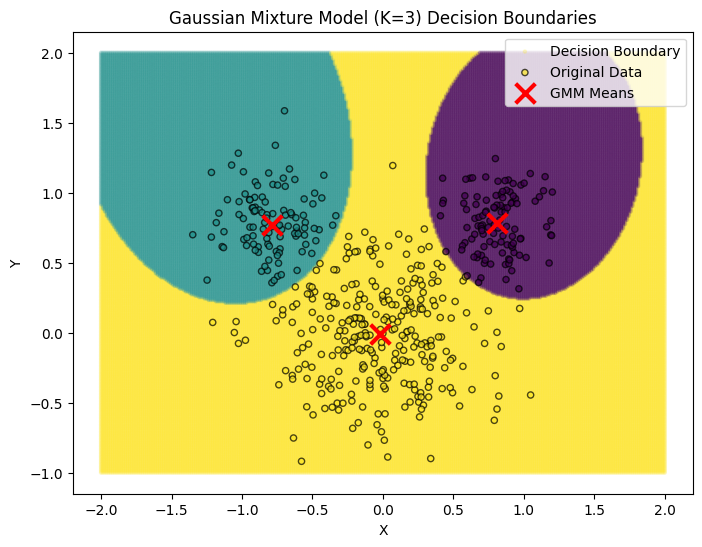

In [ ]:
boundary_labels = gmm.predict(grid_points)

plt.figure(figsize=(8, 6))

plt.scatter(grid_points[:, 0], grid_points[:, 1],
            c=boundary_labels, cmap='viridis', alpha=0.2, s=5,
            label="Decision Boundary")

plt.scatter(data_X[:, 0], data_X[:, 1],
            c=labels, cmap='viridis', s=20, edgecolors='k', alpha=0.7,
            label="Original Data")

plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1],
            c='red', marker='x', s=200, linewidths=3,
            label='GMM Means')

plt.title("Gaussian Mixture Model (K=3) Decision Boundaries")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

On the boundaries between clusters we can see that the lines aren't exactly smooth. This may be a result of the fact that near the boundaries, two or more components have comparable posterior probabilities and so there’s always a small chance that a point assigned to one cluster might have been actually generated by another component. Moreover, the reason for the fact that the yellow color dominates some parts of the plane which would seem to be closer in Euclidean distance to other clusters is explained by the fact that this cluster comes from a normal distribution with a "larger" covariance matrix.



## **Secondary Question**

**If we *didn't know* the number of clusters in advance, how could we decide on a suitable $K$ for the clustering algorithm?**  

You can illustrate your approach with **the same** dataset as in the primary question by trying different values of $K$ (and optionally plotting the evaluation metric values, e.g. silhouette scores, etc.). Or you can find another suitable dataset, it's up to you. Note, that the dataset doesn't need to be 2D in this task.

Once again, I will be using the dataset from class. To decide on a suitable K for the clustering algorithm it seems reasonable to test out the two metrics we discussed: Silhouette Score and Inertia. Let's compare their values for different K from 2 to 7.

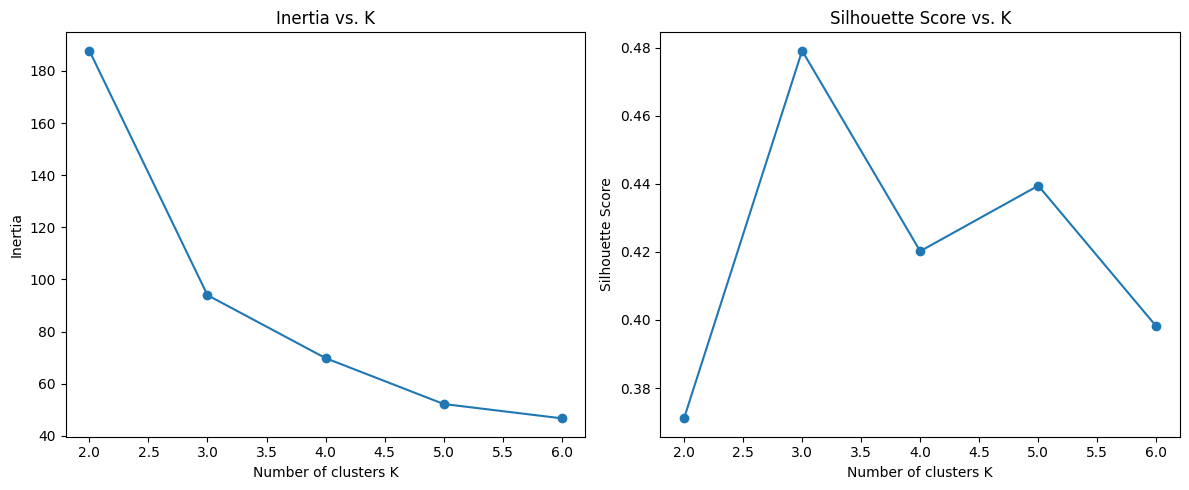

In [ ]:
K_values = range(2, 7)
inertias = []
silhouettes = []

for k in K_values:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(data_X)

    labels = gmm.predict(data_X)

    # --- Compute inertia ---
    inertia_val = 0.0
    for i, cluster_label in enumerate(labels):
        diff = data_X[i] - gmm.means_[cluster_label]
        inertia_val += np.sum(diff**2)

    inertias.append(inertia_val)

    # --- Compute silhouette score ---
    sil_val = silhouette_score(data_X, labels)
    silhouettes.append(sil_val)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_values, inertias, marker='o')
plt.xlabel("Number of clusters K")
plt.ylabel("Inertia")
plt.title("Inertia vs. K")

plt.subplot(1, 2, 2)
plt.plot(K_values, silhouettes, marker='o')
plt.xlabel("Number of clusters K")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. K")

plt.tight_layout()
plt.show()

From the inertia plot, we can see a large drop going from K=2 to K=3, and then much smaller drops for K>3.
Similarly, the silhouette score plot also tells us that K=3 seems like the best option as it achieves the highest value for this K (around 0.48). These two observations together indicate that
K=3 is the best choice because it has the best balance of compactness and separation for this dataset. And this is what we expected anyway.